# Effective Pandas
Starting from Chapter 10, and progressing until the notebook length becomes challenging.  Likely 200-300 lines of code across a number of cell.  Initiate notebook with data sets being leveraged in prior notebooks to facilitate continuation.

- Car data notebook with mpg data
- World cup history datasource

### Imports
Minimum imports to follow allong are pandas and numpy.  Potential to add matplotlib at a later point.  Unclear if this is needed at this time.

In [1]:
import pandas as pd
import numpy as np

### Datasets

In [2]:
cars = pd.read_csv("vehicles.csv")

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fifa = pd.read_csv("international_matches.csv")

### Column break out
During the prior chapters a few columns have been broken out by the author to conduct Serie specific work.  These will be extracted away from the cars dataset.

In [4]:
city_mpg = cars.city08
hwy_mpg = cars.highway08

In [5]:
make = cars.make

## Ch10 Indexing operations
Indexing is everywhere in pandas, and it is an overloaded term in general.  This multi meaning reality means it is very flexible, but also somewhat complex to keep track off as you navigate methods in the library.  In this section the goal is to introduce changing the index and accessing through the many different options which are available.

### Prepping data and renaming the index
The understanding of the many various indexing operations is challenging if the index is the default integer based (0,1,...n) structure since there does not seem to be a difference between the numeric access and the label access with this index structure.  To help demonstrate the method, the index will be modified to be a string type for the city_mpg data.

In [6]:
# rename is a method which allows the index to be updated or the name of the index to be updated
# in the former you pass a scalar singular value, in the later an equal length array
# the .to_dict() method maps the make column to the current index (i.e. {0: 'Subaru', 1:'Ford'})
city2 = city_mpg.rename(make.to_dict())

In [7]:
city2.index

Index(['Alfa Romeo', 'Ferrari', 'Dodge', 'Dodge', 'Subaru', 'Subaru', 'Subaru',
       'Toyota', 'Toyota', 'Toyota',
       ...
       'Saab', 'Saturn', 'Saturn', 'Saturn', 'Saturn', 'Subaru', 'Subaru',
       'Subaru', 'Subaru', 'Subaru'],
      dtype='object', length=45644)

In [8]:
# alternative method if the indexes are the same (size and mapping)
city2 = city_mpg.rename(make)
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 45644, dtype: int64

### Resetting the index
Sometimes operations will require a unique index.  In these instances you can reset to a monotonic increasing index with the reset_index() method.

In [9]:
# default keeps current index and returns a DataFrame
city2.reset_index()

,index,city08
0,Alfa Romeo,19
1,Ferrari,9
2,Dodge,23
3,Dodge,10
4,Subaru,17
...,...,...
45639,Subaru,19
45640,Subaru,20
45641,Subaru,18
45642,Subaru,18


In [10]:
# drop the current index for a series output
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
45639    19
45640    20
45641    18
45642    18
45643    16
Name: city08, Length: 45644, dtype: int64

In [11]:
# rename and keep the string column
(city2
 .rename_axis('Make')
 .reset_index()
)

,Make,city08
0,Alfa Romeo,19
1,Ferrari,9
2,Dodge,23
3,Dodge,10
4,Subaru,17
...,...,...
45639,Subaru,19
45640,Subaru,20
45641,Subaru,18
45642,Subaru,18


### Accessing data with .loc attribute
The .loc attribute allows data to be accessed by label, and can be very handy with the correct type of index. This can also be achieved with masking if the information is already in the dataset, but the .loc attribute is a very intuitive process.  Using .loc is a much more explicit process than standard indexing, and helps others understand your code.  Ways to use .loc:
- A scalar index entry
- A list of index labels
- A slice of labels (closed interval required with stop value)
- An index
- A boolean array (same index labels, but with true or false as data value)
- A function that accepts a series and returns one of the above

In [12]:
# Scalar value returns only matching index labels, multiple entries yeilds a Series, but on yields a scalar
city2.loc['Subaru']

Subaru    17
Subaru    21
Subaru    22
Subaru    19
Subaru    20
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 974, dtype: int64

In [13]:
# Scalar output
city2.loc['Fisker']

20

In [14]:
# overriding this behavior with a list entry
city2.loc[['Fisker']]

Fisker    20
Name: city08, dtype: int64

In [15]:
# works for multiples as well
city2.loc[['Ferrari', 'Lamborghini']]

Ferrari         9
Ferrari        12
Ferrari        11
Ferrari        10
Ferrari        11
               ..
Lamborghini     6
Lamborghini     8
Lamborghini     8
Lamborghini     8
Lamborghini     8
Name: city08, Length: 419, dtype: int64

> **Note:** Slicing is allowed, but if you do not sort the index first, it will throw a key error, or return something incorrect relative to the desired query

In [16]:
# Use try except to avoid stoping notebook execution, notice this is a closed interval
try:
    city2.loc['Ferrari': 'Lamborghini']
except:
    print('Key error')

Key error


In [17]:
# correct method
city2.sort_index().loc['Ferrari': 'Lamborghini']

Ferrari        11
Ferrari        16
Ferrari        15
Ferrari        17
Ferrari        11
               ..
Lamborghini     8
Lamborghini     8
Lamborghini     9
Lamborghini    13
Lamborghini    13
Name: city08, Length: 12483, dtype: int64

In [18]:
# partial labels work also.  
# Yeilds everything starting with F up to items labeled as J (only J), includes  labels starting with GHI as well
city2.sort_index().loc['F':'J']

Federal Coach    13
Federal Coach    13
Federal Coach    13
Federal Coach    13
Federal Coach    13
                 ..
Isuzu            15
Isuzu            14
Isuzu            15
Isuzu            14
Isuzu            15
Name: city08, Length: 9949, dtype: int64

> **Note**: Indexing with a pandas index is also posible, but there are some catches, especially if there are duplicate values.  This is most often useful when trying to align one pandas element to another after filtering the first.

In [19]:
# create an index object for pandas using a label based index
idx = pd.Index(['Dodge'])
# pass the index into the .loc attribute, yielding 2659 elements
city2.loc[idx]

Dodge    23
Dodge    10
Dodge    12
Dodge    11
Dodge    11
         ..
Dodge    18
Dodge    17
Dodge    14
Dodge    14
Dodge    11
Name: city08, Length: 2659, dtype: int64

In [20]:
# warning, if Dodge was duplicated, you would duplicate all the values
idx = pd.Index(['Dodge', 'Dodge'])
len(city2.loc[idx])

5318

**Fancy Indexing** with boolean arrays is also possible with the .loc attribute.  In this case, the returned Series is filter on True values only after a logic statement is evaluated.

In [21]:
# passing a logic statement to filter the data, 529 entries
city2.loc[city2 > 50]

Nissan         81
Toyota         81
Toyota         81
Ford           74
Nissan         84
             ... 
Volkswagen    104
Volkswagen    104
Volkswagen    115
Volkswagen    115
Volkswagen    115
Name: city08, Length: 529, dtype: int64

#### Function indexing with .loc
Using a function within the .loc attribute is the last method that can be used to filter the data.  This process can be extremely handy when trying to apply a number of logic checks across a record in a dataframe.  While on a series it is somewhat overkill, and example will provide some context.

In [22]:
# Old pricing data from prior year needs to be inflated 10% then checked for anything greater than $3
cost = pd.Series([1.00, 2.25, 3.99, 0.99, 2.79], index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
inflation = 1.10
(cost
 .mul(inflation)
 .loc[lambda x: x>3.00]
)

# could have defined a function as well, so def gt3(s): return s>3, then passed .loc[gt3] in place of lambda

Melon      4.389
Carrots    3.069
dtype: float64

### The .iloc attribute
Similar to the .loc attribute in some ways, this is a monotomically increasing index based process.  Even if your index is string based, iloc using the numeric position to index your Series or DataFrame.  iloc takes the following types of indexers:
- Scalar input value (integer)
- List of index positions (integer)
- Slice of index positions (integers, half open interval to last value excluded)
- Numpy array or Python list of Boolean values (mask)
- Function that accepts a series and returns one of the above options

In [23]:
# Scalar entry and return
city2[0], city2[-1]

(19, 16)

In [24]:
# List entry, Series return even with on value
city2[[0]]

Alfa Romeo    19
Name: city08, dtype: int64

In [25]:
# List entry multi value request
city2[[0, 1, 2, 3]]

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Name: city08, dtype: int64

In [26]:
# Slice
city2.iloc[0:5]

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64

> **Note**: Boolean masking with fancy indexing is a bit more complicated with the iloc attribute, because a string based boolean array will fail.  To overcome this a python list or numpy array must be used.

In [27]:
# standard mask approach
try:
    city2.iloc[city2 > 50]
except:
    print("Non integer based index doesn't work with iloc, try np.array(city2 > 50)")

Non integer based index doesn't work with iloc, try np.array(city2 > 50)


In [28]:
city2.iloc[np.array(city2 > 50)]

Nissan         81
Toyota         81
Toyota         81
Ford           74
Nissan         84
             ... 
Volkswagen    104
Volkswagen    104
Volkswagen    115
Volkswagen    115
Volkswagen    115
Name: city08, Length: 529, dtype: int64

In [29]:
# function call that returns a Series with interger index, not worth the effort
def gt05(S):
    return S > 1.0

(city2
 .div(hwy_mpg.rename(make.to_dict()), fill_value=0)
 .iloc[np.array(gt05(city2.div(hwy_mpg.rename(make.to_dict()))))]
)

Toyota    1.265625
Toyota    1.024390
Toyota    1.265625
Ford      1.275862
Ford      1.363636
            ...   
Honda     1.194444
Honda     1.176471
Toyota    1.078947
Toyota    1.081081
Toyota    1.085714
Length: 699, dtype: float64

#### Head, Tail, and Sample
Three methods to inspect portions of the data. 

In [30]:
city2.head(3), city2.tail(3), city2.sample(6, random_state=42)

(Alfa Romeo    19
 Ferrari        9
 Dodge         23
 Name: city08, dtype: int64,
 Subaru    18
 Subaru    18
 Subaru    16
 Name: city08, dtype: int64,
 Pontiac     15
 Geo         22
 Kia         14
 Toyota      16
 Plymouth    17
 GMC         12
 Name: city08, dtype: int64)

### Filtering Index Values
There is a built in filter method that can be used to further customize how data is filter by index.  This allows filtering by the following methods:
- exact match
- substring
- regex

In [31]:
try:
    city2.filter(items=['Ford','Subaru'])
except:
    print('cannot reindex from a duplicate axis')

cannot reindex from a duplicate axis


In [32]:
# partial match
city2.filter(like='rd')

Ford    18
Ford    16
Ford    17
Ford    17
Ford    15
        ..
Ford    26
Ford    19
Ford    21
Ford    18
Ford    19
Name: city08, Length: 3644, dtype: int64

In [33]:
# regular expression
city2.filter(regex='(Ford)|(Subaru)')

Subaru    17
Subaru    21
Subaru    22
Ford      18
Ford      16
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 4618, dtype: int64

### Reindexing data
The Reindexing method allows a user to map and existing index to another array.  If there is no direct map, it will simply load a Nan value when the new index is mapped across.  It does not handle duplicate entries.   

In [34]:
# a is broght in will d is dropped, and a has no value in the existing dataset
sr1 = pd.Series([10, 20, 30], index=['a','b','c'])
sr2 = pd.Series([15, 25, 35], index=['b','c','d'])

sr2.reindex(sr1.index)

a     NaN
b    15.0
c    25.0
dtype: float64

In [35]:
try:
    city2.reindex(['Missing','Ford'])
except:
    print('Cannot reindex from a duplicate axis in an existing Series')
    print('try this: city_mpg.reindex([1,2,3,4,5])')
    print(eval('city_mpg.reindex([0,0,10,20,2_000_000])'))

Cannot reindex from a duplicate axis in an existing Series
try this: city_mpg.reindex([1,2,3,4,5])
0          19.0
0          19.0
10         23.0
20         14.0
2000000     NaN
Name: city08, dtype: float64


## Ch 11: String methods
There are many string manipulation methods in python, which is one of the languages stregths.  These are an equivalent number of string methods built into pandas to match the standard library offerring.  There are also a handful of types to be aware of for strings.  By default, pandas will load strings as objects, which is a catch all type.  It allows multiple datatypes in one array.  Ideally the types can be moved to string or category.

- Object: Allow multiple types (list, dict, strings) in one array.  Default string type
- String: Type for free text string types, allows pandas null types.
- Category: Optimized type for categorical data fields, which optimized memory and performance.

In [36]:
make.dtype

dtype('O')

In [37]:
make.astype('string')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: string

In [38]:
make.astype('category')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: category
Categories (141, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

### Str. accessor
Pandas has a build in accessor for string manipulation methods.  The .str accessor allows the wide number of accessor methods to be used to modify, search, change, or interogate strings.

In [39]:
make.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
45639        subaru
45640        subaru
45641        subaru
45642        subaru
45643        subaru
Name: make, Length: 45644, dtype: object

In [40]:
make.str.find('A')

0        0
1       -1
2       -1
3       -1
4       -1
        ..
45639   -1
45640   -1
45641   -1
45642   -1
45643   -1
Name: make, Length: 45644, dtype: int64

In [41]:
# expand converts result into a series, then value counts groups the outcome basically yielding non alpha numeric characters
make.str.extract(r'([^a-z A-Z])', expand=False).value_counts()

-    2018
.      46
,       9
Name: make, dtype: int64

> **Note:** THe inverse of the above is `data.str.extract(r'([^0-9.])', expand=False)` Yields alpha characters.

### Splitting data
In some instances the data field will be a range representation, such as surveys that require and age selection.  Pandas calls this an object because it does not have any way to handle the dash on ingestion.

In [42]:
age = pd.Series(['0-10','11-15','11-15','61-65','46-50'])
age

0     0-10
1    11-15
2    11-15
3    61-65
4    46-50
dtype: object

In [43]:
# not exactly what we want
age.str.split('-')

0     [0, 10]
1    [11, 15]
2    [11, 15]
3    [61, 65]
4    [46, 50]
dtype: object

In [44]:
# alternate methodology, yields correct dtype and extracted away value
(age
 .str.split('-', expand=True)
 .iloc[:,0]
 .astype('int')
)

0     0
1    11
2    11
3    61
4    46
Name: 0, dtype: int32

In [45]:
# another alternative
(age
 .str.slice(-2)
 .astype('int')
)

0    10
1    15
2    15
3    65
4    50
dtype: int32

In [46]:
# And another alternative
(age
 .str[-2:]
 .astype('int')
)

0    10
1    15
2    15
3    65
4    50
dtype: int32

In [47]:
# To get the mean, we take the average of the range after splitting
(age
 .str.split('-',expand=True)
 .astype('int')
 .mean(axis=1)
)

0     5.0
1    13.0
2    13.0
3    63.0
4    48.0
dtype: float64

#### Split - Data Simluation 
If you wanted to get a random number between the ages provided by the range this could also be done to simlate the age data versus taking a straight average.

In [48]:
import random
def between(row):
    return random.randint(*row.values)

In [49]:
(age
 .str.split('-',expand=True)
 .astype('int')
 .apply(between, axis='columns')
)

0     3
1    12
2    15
3    63
4    49
dtype: int64

#### Optimizing .apply with Cython
Cython is a C python library which allows the python scrips to compile using C.  This requires some additional effort to set up, but for large data sets or something being used on live production data, it can be an invalvuable tool.  **It requires C++ to run the cell magics and optimize, so it is not demonstrated below.**  Eventually all of the functions are rewritten using numpy arrays and lambdas to optimize.   

Simply lambda and numpy integration is leveraged below:

In [50]:
%%timeit
(age
 .str.split('-',expand=True)
 .astype('int')
 .apply(between, axis='columns')
)

1.74 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [51]:
%%timeit
(age
 .str.split('-',expand=True)
 .astype('int')
 .apply(lambda row: random.randint(row[0],row[1]),axis=1)
)

1.38 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%%timeit
pd.Series(np.array(age
 .str.split('-',expand=True)
 .astype('int')).mean(axis=1))

1.13 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Replacing text
There are two different and related replace options in pandas.  There is a .str.replace() method, and then there is the pd.Series().replace() method.  In instances where individual characters are in question, then the .str accessor is used.  If it is whosale replacement, the Series.replace() method is the best fit.

In [53]:
# Unicode replacement
make.str.replace('A','Ä')

0        Älfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: object

In [54]:
# Calling Series.replace() is looking for a whole string, so this does nothing
make.replace('A','Ä')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: object

In [55]:
# you can feed Series.replace() with a dict to be explicit, but it can be slow
make.replace({'Ferrari':'VroomVroom','Subaru':'AllWheels','Dodge':'RAM'})

0        Alfa Romeo
1        VroomVroom
2               RAM
3               RAM
4         AllWheels
            ...    
45639     AllWheels
45640     AllWheels
45641     AllWheels
45642     AllWheels
45643     AllWheels
Name: make, Length: 45644, dtype: object

In [56]:
# for finer control indicate you want a regex replacement, then it works for letters
make.replace('A','Ä', regex=True)

0        Älfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: object

### Ch11 P-Sets
With a dataset of your choice:
1. Lowercase the values of a string column
2. Slice out the first value of a string column
3. Slice out the last three characters of a string column
4. Create a series extracting the numeric values from an object column
5. Create a series and extract the non ASCII values
6. Create a dataframe with the dummy columns for every character in the column

In [57]:
# P1 lower case a string column
fifa.tournament.str.lower()

0        fifa world cup qualification
1                            friendly
2        fifa world cup qualification
3                            friendly
4        fifa world cup qualification
                     ...             
23916             uefa nations league
23917             uefa nations league
23918                       kirin cup
23919                       kirin cup
23920                        friendly
Name: tournament, Length: 23921, dtype: object

In [58]:
# P2 Slice out the first value of a string column
(fifa
 .tournament
 .str
 .slice(stop=1)
)

0        F
1        F
2        F
3        F
4        F
        ..
23916    U
23917    U
23918    K
23919    K
23920    F
Name: tournament, Length: 23921, dtype: object

In [59]:
# P3 Slice out the last three values of a string column
(fifa
 .tournament
 .str
 [-3:]
)

0        ion
1        dly
2        ion
3        dly
4        ion
        ... 
23916    gue
23917    gue
23918    Cup
23919    Cup
23920    dly
Name: tournament, Length: 23921, dtype: object

In [60]:
# P4 Create a series extracting the numeric values from an object column
(fifa
 .date
 .str
 .extract(r'([^a-z A-Z]*)')
#  .isna()
#  .value_counts()
)

,0
0,1993-08-08
1,1993-08-08
2,1993-08-08
3,1993-08-08
4,1993-08-08
...,...
23916,2022-06-14
23917,2022-06-14
23918,2022-06-14
23919,2022-06-14


In [61]:
# P5 Create a series and extract the non ASCII values
(fifa
 .date
 .str
 .extract(r'([^\x00-\x7F]*)')
#  .isna()
#  .value_counts()
)

,0
0,
1,
2,
3,
4,
...,...
23916,
23917,
23918,
23919,


In [62]:
#P6 Create a dataframe with the dummy columns for every character in the column
pd.DataFrame([list(i) for i in fifa.home_team])
#  .str
#  .findall(r'([a-z A-Z])')
#  .get_dummies()
#  .groupby(0)
#  .sum(axis=0)
#  .sort_values(ascending=False)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,B,o,l,i,v,i,a,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,B,r,a,z,i,l,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,E,c,u,a,d,o,r,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,G,u,i,n,e,a,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,P,a,r,a,g,u,a,y,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,M,o,l,d,o,v,a,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23917,L,i,e,c,h,t,e,n,s,t,...,None,None,None,None,None,None,None,None,None,None
23918,C,h,i,l,e,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23919,J,a,p,a,n,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## Ch12 Date and Time manipulation
Pandas allows the creation and usage of Datetime dtypes, which can be very useful in the analysis of data.  It also happens to be the most complicated type to get correct in the dtypes available in pandas.  They often arrive as a string or object type because pandas cannot interpret the many different formats potentially available.

### Date Theory
Date theory is complicated as soon as the data is moved away from UTC, which is the time at 0º longitude.  UTC is nice because it is always monotomically increasing.  This means there are never issues with duplicate times on the same date.  In the case of wall time (local time zone specific) this is not the case.  Great care should be taken when using local time as it can easily lead to unexpected errors and ambiguous times in the system.  One the date of the daylight savings time switch, there will be two entries for each minute from 1-2AM in the fall, and no entries in the spring.  Stay in UTC if at all possible.  If time accuracy is not important, then focus on the date information.  

In [63]:
col = pd.Series(
['2015-03-08 08:00:00+00:00',
 '2015-03-08 08:30:00+00:00',
 '2015-03-08 09:00:00+00:00',
 '2015-03-08 09:30:00+00:00',
 '2015-11-01 06:30:00+00:00',
 '2015-11-01 07:00:00+00:00',
 '2015-11-01 07:30:00+00:00',
 '2015-11-01 08:00:00+00:00',
 '2015-11-01 08:30:00+00:00',
 '2015-11-01 08:00:00+00:00',
 '2015-11-01 08:30:00+00:00',
 '2015-11-01 09:00:00+00:00',
 '2015-11-01 09:30:00+00:00',
 '2015-11-01 10:00:00+00:00',
]
)

In [64]:
utc_s = pd.to_datetime(col, utc=True)
utc_s

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-11-01 06:30:00+00:00
5    2015-11-01 07:00:00+00:00
6    2015-11-01 07:30:00+00:00
7    2015-11-01 08:00:00+00:00
8    2015-11-01 08:30:00+00:00
9    2015-11-01 08:00:00+00:00
10   2015-11-01 08:30:00+00:00
11   2015-11-01 09:00:00+00:00
12   2015-11-01 09:30:00+00:00
13   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

In [65]:
utc_s.dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-11-01 00:30:00-06:00
5    2015-11-01 01:00:00-06:00
6    2015-11-01 01:30:00-06:00
7    2015-11-01 01:00:00-07:00
8    2015-11-01 01:30:00-07:00
9    2015-11-01 01:00:00-07:00
10   2015-11-01 01:30:00-07:00
11   2015-11-01 02:00:00-07:00
12   2015-11-01 02:30:00-07:00
13   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [66]:
# Adding offsets
s_col = pd.Series(
['2015-03-08 01:00:00+07:00',
 '2015-03-08 01:30:00+07:00',
 '2015-03-08 03:00:00+06:00',
 '2015-03-08 03:30:00+06:00',
 '2015-11-01 00:30:00+06:00',
 '2015-11-01 01:00:00+06:00',
 '2015-11-01 01:30:00+06:00',
 '2015-11-01 01:00:00+07:00',
 '2015-11-01 01:30:00+07:00',
 '2015-11-01 01:00:00+07:00',
 '2015-11-01 01:30:00+07:00',
 '2015-11-01 02:00:00+07:00',
 '2015-11-01 02:30:00+07:00',
 '2015-11-01 03:00:00+07:00',
]
)

In [67]:
pd.to_datetime(s_col, utc=True).dt.tz_convert('America/Chicago')

0    2015-03-07 12:00:00-06:00
1    2015-03-07 12:30:00-06:00
2    2015-03-07 15:00:00-06:00
3    2015-03-07 15:30:00-06:00
4    2015-10-31 13:30:00-05:00
5    2015-10-31 14:00:00-05:00
6    2015-10-31 14:30:00-05:00
7    2015-10-31 13:00:00-05:00
8    2015-10-31 13:30:00-05:00
9    2015-10-31 13:00:00-05:00
10   2015-10-31 13:30:00-05:00
11   2015-10-31 14:00:00-05:00
12   2015-10-31 14:30:00-05:00
13   2015-10-31 15:00:00-05:00
dtype: datetime64[ns, America/Chicago]

### Local Date and Time
To load the local date and time we must have the date, the offset, and the timezone information.  This can be provided in the same data set or seperately to create the datetime information.

In [68]:
time = pd.Series(['2015-03-08 01:00:00', '2015-03-08 01:30:00', '2015-03-08 02:00:00', '2015-03-08 02:30:00',
                 '2015-03-08 03:00:00', '2015-03-08 02:00:00', '2015-03-08 02:30:00', '2015-03-08 03:00:00',
                 '2015-03-08 03:30:00', '2015-11-01 00:30:00', '2015-11-01 01:00:00', '2015-11-01 01:30:00',
                 '2015-11-01 02:00:00', '2015-11-01 02:30:00', '2015-11-01 01:00:00', '2015-11-01 01:30:00',
                 '2015-11-01 02:00:00', '2015-11-01 02:30:00', '2015-11-01 03:00:00'])

In [69]:
offset = pd.Series([-7,-7,-7,-7,-7,-6,-6,-6,-6,-6,-6,-6,-6,-6,-7,-7,-7,-7,-7])

In [70]:
# Lengths are the same and the offset value aligns with the appropriate dt value for the offset
len(time) == len(offset)

True

> **Note:** This is going to require the use of .groupby and .transform to facilitate combining and adjusting the times.  These will be covered later in greater detail.  Groupby uses a different Series, but that series is aligned with the datetime data.  Otherwise this groupby would yield the wrong values

In [71]:
# tranform takes the grouped data and conducts and operation, then returning the data in its no aggregated form
(pd.to_datetime(time)
 .groupby(offset)
 .transform(lambda s: s.dt.tz_localize(s.name)
                       .dt.tz_convert('America/Denver'))
)

0    2015-03-07 18:00:07-07:00
1    2015-03-07 18:30:07-07:00
2    2015-03-07 19:00:07-07:00
3    2015-03-07 19:30:07-07:00
4    2015-03-07 20:00:07-07:00
5    2015-03-07 19:00:06-07:00
6    2015-03-07 19:30:06-07:00
7    2015-03-07 20:00:06-07:00
8    2015-03-07 20:30:06-07:00
9    2015-10-31 18:30:06-06:00
10   2015-10-31 19:00:06-06:00
11   2015-10-31 19:30:06-06:00
12   2015-10-31 20:00:06-06:00
13   2015-10-31 20:30:06-06:00
14   2015-10-31 19:00:07-06:00
15   2015-10-31 19:30:07-06:00
16   2015-10-31 20:00:07-06:00
17   2015-10-31 20:30:07-06:00
18   2015-10-31 21:00:07-06:00
dtype: datetime64[ns, America/Denver]

> **See above:** The offsets were interpretted as minutes and not hours.  The data needs to be updated to -##:## format

In [72]:
offset = offset.replace({-7:'-07:00',-6:'-06:00'})

In [73]:
local = (pd.to_datetime(time)
 .groupby(offset)
 .transform(lambda s: s.dt.tz_localize(s.name)
                       .dt.tz_convert('America/Denver'))
)

In [74]:
local

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-03-08 04:00:00-06:00
5    2015-03-08 01:00:00-07:00
6    2015-03-08 01:30:00-07:00
7    2015-03-08 03:00:00-06:00
8    2015-03-08 03:30:00-06:00
9    2015-11-01 00:30:00-06:00
10   2015-11-01 01:00:00-06:00
11   2015-11-01 01:30:00-06:00
12   2015-11-01 01:00:00-07:00
13   2015-11-01 01:30:00-07:00
14   2015-11-01 01:00:00-07:00
15   2015-11-01 01:30:00-07:00
16   2015-11-01 02:00:00-07:00
17   2015-11-01 02:30:00-07:00
18   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [75]:
local.dt.tz_convert('UTC')

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

### Epochs
If you are so inclined, you can determine the seconds past the UNIX based epoch.

In [76]:
import datetime as dt

In [77]:
secs = (local.dt.tz_convert(None) - dt.datetime(1970,1,1)).dt.total_seconds().astype(int)

In [78]:
secs

0     1425801600
1     1425803400
2     1425805200
3     1425807000
4     1425808800
5     1425801600
6     1425803400
7     1425805200
8     1425807000
9     1446359400
10    1446361200
11    1446363000
12    1446364800
13    1446366600
14    1446364800
15    1446366600
16    1446368400
17    1446370200
18    1446372000
dtype: int32

In [79]:
(pd.to_datetime(secs,unit='s').dt.tz_localize('UTC'))

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

### Manipulating Dates
For further demonstration of the use of dates, and data set with Snowfall data will be leveraged.  This is based on a ski resort in the Utah/Denver timezone.  

In [80]:
url = r'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

In [81]:
url

'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'

In [82]:
alta_df = pd.read_csv('alta-noaa-1980-2019.csv')

In [83]:
alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,DASF,DASF_ATTRIBUTES,...,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
dates = pd.to_datetime(alta_df.DATE)

In [85]:
dates

0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14271   2019-12-27
14272   2019-12-28
14273   2019-12-29
14274   2019-12-30
14275   2019-12-31
Name: DATE, Length: 14276, dtype: datetime64[ns]

In [86]:
dates.dt.day_name('es_ES')

0           Martes
1        Miércoles
2           Jueves
3          Viernes
4           Sábado
           ...    
14271      Viernes
14272       Sábado
14273      Domingo
14274        Lunes
14275       Martes
Name: DATE, Length: 14276, dtype: object

In [87]:
# property because no parameters to specify for different behavior
dates.dt.is_month_end

0        False
1        False
2        False
3        False
4        False
         ...  
14271    False
14272    False
14273    False
14274    False
14275     True
Name: DATE, Length: 14276, dtype: bool

In [88]:
# method because you can and should provide parameters
dates.dt.strftime('%d/%m/%y')

0        01/01/80
1        02/01/80
2        03/01/80
3        04/01/80
4        05/01/80
           ...   
14271    27/12/19
14272    28/12/19
14273    29/12/19
14274    30/12/19
14275    31/12/19
Name: DATE, Length: 14276, dtype: object

### P-Sets
With a dataset of your choice:
1. Convert a column with date information into a datetime column.
2. Convert a date column into UTC dates.
3. Convert a date column into local dates with a timezone.
4. Convert a date colum into epoch values.
5. Convert an epoch number into UTC.

In [89]:
fifa.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
f_dates = pd.to_datetime(fifa.date, utc=True)

In [91]:
f_dates

0       1993-08-08 00:00:00+00:00
1       1993-08-08 00:00:00+00:00
2       1993-08-08 00:00:00+00:00
3       1993-08-08 00:00:00+00:00
4       1993-08-08 00:00:00+00:00
                   ...           
23916   2022-06-14 00:00:00+00:00
23917   2022-06-14 00:00:00+00:00
23918   2022-06-14 00:00:00+00:00
23919   2022-06-14 00:00:00+00:00
23920   2022-06-14 00:00:00+00:00
Name: date, Length: 23921, dtype: datetime64[ns, UTC]

In [92]:
f_dates.dt.tz_convert('America/Chicago')

0       1993-08-07 19:00:00-05:00
1       1993-08-07 19:00:00-05:00
2       1993-08-07 19:00:00-05:00
3       1993-08-07 19:00:00-05:00
4       1993-08-07 19:00:00-05:00
                   ...           
23916   2022-06-13 19:00:00-05:00
23917   2022-06-13 19:00:00-05:00
23918   2022-06-13 19:00:00-05:00
23919   2022-06-13 19:00:00-05:00
23920   2022-06-13 19:00:00-05:00
Name: date, Length: 23921, dtype: datetime64[ns, America/Chicago]

In [93]:
secs = (f_dates.dt.tz_convert(None) - dt.datetime(1970,1,1)).dt.total_seconds().astype(int)

In [94]:
secs

0         744768000
1         744768000
2         744768000
3         744768000
4         744768000
            ...    
23916    1655164800
23917    1655164800
23918    1655164800
23919    1655164800
23920    1655164800
Name: date, Length: 23921, dtype: int32

In [95]:
(pd.to_datetime(secs, unit='s').dt.tz_localize('UTC'))

0       1993-08-08 00:00:00+00:00
1       1993-08-08 00:00:00+00:00
2       1993-08-08 00:00:00+00:00
3       1993-08-08 00:00:00+00:00
4       1993-08-08 00:00:00+00:00
                   ...           
23916   2022-06-14 00:00:00+00:00
23917   2022-06-14 00:00:00+00:00
23918   2022-06-14 00:00:00+00:00
23919   2022-06-14 00:00:00+00:00
23920   2022-06-14 00:00:00+00:00
Name: date, Length: 23921, dtype: datetime64[ns, UTC]

## Ch13 DateTime indexes
With a datetime index you can do some powerful manipulation of datasets, and pandas understands how to aggregate and subdivide based on date datatypes.

### Using dates to subdivide data
Shifting back to the altavist ski resort dataframe, we will move the dates into the index to interogate the snowfall data.  This requires an initial shift of the date column into the index.

In [96]:
alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,DASF,DASF_ATTRIBUTES,...,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.59058,-111.63703,2654.8,1980-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df
        .SNOW
        .rename(dates)
       )

In [98]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-12-27    0.0
2019-12-28    3.2
2019-12-29    3.8
2019-12-30    2.4
2019-12-31    0.0
Name: SNOW, Length: 14276, dtype: float64

In [99]:
snow.isna().any()

True

### Dealing with missing data using datetime index
There are many different approaches to leveraging a datetime index.  Multiple will be demonstrated here as we navigate missing data in the snow fall totals by day.  The focus is the index being used to manage the missing data.

In [100]:
snow[snow.isna()]

1985-07-30   NaN
1985-09-12   NaN
1985-09-19   NaN
1986-02-07   NaN
1986-06-26   NaN
              ..
2017-04-26   NaN
2017-09-20   NaN
2017-10-02   NaN
2017-12-23   NaN
2018-12-03   NaN
Name: SNOW, Length: 365, dtype: float64

In [101]:
snow.loc['1985-09':'1985-09-20']

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    NaN
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    NaN
1985-09-20    0.0
Name: SNOW, dtype: float64

In [102]:
(snow
 .loc['1985-09':'1985-09-20']
 .fillna(0)
)

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    0.0
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    0.0
1985-09-20    0.0
Name: SNOW, dtype: float64

In [103]:
# Dealing with missing values when it is not summer means there could have been snow; ffill, bfill, 
(snow
 .loc['1987-12-30':'1988-01-10']
 .bfill()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    0.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    2.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [104]:
# Dealing with missing values when it is not summer means there could have been snow; ffill, bfill, 
(snow
 .loc['1987-12-30':'1988-01-10']
 .interpolate()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    2.5
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    1.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [105]:
# Smarter interpolation using where().  where() replaces false values
winter = (snow.index.quarter == 1) | (snow.index.quarter ==4)
(snow
 .where(~(winter & snow.isna()), snow.interpolate())
 .where(~(~winter & snow.isna()), 0)
)

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-12-27    0.0
2019-12-28    3.2
2019-12-29    3.8
2019-12-30    2.4
2019-12-31    0.0
Name: SNOW, Length: 14276, dtype: float64

In [106]:
# Validation of previously Nan values using Smarter interpolation with where(). 0 for summer, interp for winter
(snow
 .where(~(winter & snow.isna()), snow.interpolate())
 .where(~(~winter & snow.isna()), 0)
 .loc[['1985-09-19','1988-01-01']]
)

1985-09-19    0.0
1988-01-01    2.5
Name: SNOW, dtype: float64

In [107]:
# Dealing with missing values when it is not summer means there could have been snow; ffill, bfill, 
(snow
 .loc['1987-12-30':'1988-01-10']
 .dropna()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

### Shifting data
Data can be shifted which is useful for sequenced data.  In those instances the data can be moved forward or backward for comparison.

In [108]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-12-27    0.0
2019-12-28    3.2
2019-12-29    3.8
2019-12-30    2.4
2019-12-31    0.0
Name: SNOW, Length: 14276, dtype: float64

In [109]:
snow.shift(1)

1980-01-01    NaN
1980-01-02    2.0
1980-01-03    3.0
1980-01-04    1.0
1980-01-05    0.0
             ... 
2019-12-27    1.4
2019-12-28    0.0
2019-12-29    3.2
2019-12-30    3.8
2019-12-31    2.4
Name: SNOW, Length: 14276, dtype: float64

In [110]:
snow.shift(-1)

1980-01-01    3.0
1980-01-02    1.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    1.0
             ... 
2019-12-27    3.2
2019-12-28    3.8
2019-12-29    2.4
2019-12-30    0.0
2019-12-31    NaN
Name: SNOW, Length: 14276, dtype: float64

In [111]:
# with this you can calculate a rolling average
(snow
 .add(snow.shift(1))
 .add(snow.shift(2))
 .add(snow.shift(3))
 .add(snow.shift(4))
 .div(5)
)

1980-01-01     NaN
1980-01-02     NaN
1980-01-03     NaN
1980-01-04     NaN
1980-01-05    1.20
              ... 
2019-12-27    2.66
2019-12-28    3.06
2019-12-29    3.16
2019-12-30    2.16
2019-12-31    1.88
Name: SNOW, Length: 14276, dtype: float64

In [112]:
# Of couse there is already a short hand in pandas for this
(snow
 .rolling(5)
 .mean()
)

1980-01-01     NaN
1980-01-02     NaN
1980-01-03     NaN
1980-01-04     NaN
1980-01-05    1.20
              ... 
2019-12-27    2.66
2019-12-28    3.06
2019-12-29    3.16
2019-12-30    2.16
2019-12-31    1.88
Name: SNOW, Length: 14276, dtype: float64

### Rolling objects
Extending this discussion, there are many methods that work to aggregate rolling objects.  The mean() is the most obvious example, but there are a number of other interesting ways to use the window of values to smooth and approximate behavior.
- agg(): allows used defined function for scalar return
- apply(): custom user defined aggregation
- max(), min(), mean(), median(), count()
- corr(): correlation coefficient
- cov(): covariance

In [113]:
(snow
 .rolling(5)
 .max()
)

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    3.0
             ... 
2019-12-27    7.4
2019-12-28    7.4
2019-12-29    7.4
2019-12-30    3.8
2019-12-31    3.8
Name: SNOW, Length: 14276, dtype: float64

### Resampling using date index
Resampling is a great way to aggregate a data set across a specific timeframe depending on the granularity of the original data.  If you have daily data, you may want to resample for weekly max values, or perhaps monthly.

In [114]:
(snow
 .resample('M')
 .max()
)

1980-01-31    20.0
1980-02-29    25.0
1980-03-31    16.0
1980-04-30    10.0
1980-05-31     9.0
              ... 
2019-08-31     0.0
2019-09-30     2.8
2019-10-31    12.4
2019-11-30    14.7
2019-12-31    11.5
Freq: M, Name: SNOW, Length: 480, dtype: float64

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


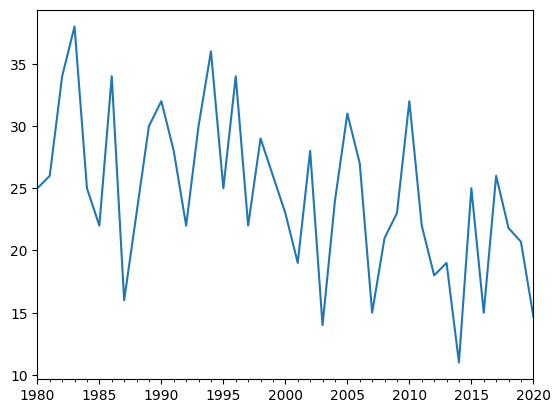

In [115]:
# seasonal snowfall max on an annual basis.  A for annual, May for month of the year
(snow
 .resample('A-May')
 .max()
 .plot()
);

In [116]:
# Aggregating then transforming back to the original shape to show monthly percentage snow on date
(snow
 .div(snow
     .resample('M')
     .transform('sum'))
 .mul(100)
 .fillna(0)
)

1980-01-01    1.388889
1980-01-02    2.083333
1980-01-03    0.694444
1980-01-04    0.000000
1980-01-05    0.000000
                ...   
2019-12-27    0.000000
2019-12-28    4.295302
2019-12-29    5.100671
2019-12-30    3.221477
2019-12-31    0.000000
Name: SNOW, Length: 14276, dtype: float64

In [117]:
# Monthly percent contribution for snowfall for 2017 ske season
season2017 = snow.loc['2016-10':'2017-05']
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
)

2016-10-31     2.153969
2016-11-30     9.772637
2016-12-31    15.715995
2017-01-31    25.468688
2017-02-28    21.041085
2017-03-31     9.274033
2017-04-30    14.738732
2017-05-31     1.834862
Freq: M, Name: SNOW, dtype: float64

### Groupby, the generic resample
Groupby is the utility resample method and can offer pretty effective methods for aggregating data.  This can work with or without a datetime index in place.  It is most common on DataFrames, but can also be used on Series information.  Here, the snow data is compiled using a groupby method for the season through a function defintion.

In [118]:
# this is a confusing syntax to understand
# the function looks at the date and converts it to a year for the season
# anything greater than October is converted to the next year and aggegated with everything less than October
def season(idx):
    year = idx.year
    month = idx.month
    return year.where((month < 10), year+1)

In [119]:
snow.loc['2009-10':'2010-09'].sum()

391.0

In [120]:
(snow
 .loc['2009':'2019']
 .groupby(season)
 .sum()
)

2009    319.7
2010    391.0
2011    533.8
2012    293.5
2013    362.8
2014    358.7
2015    284.3
2016    354.6
2017    524.0
2018    308.8
2019    508.3
2020    177.3
Name: SNOW, dtype: float64

In [121]:
# the same can be accomplished with a resample methodology
(snow
 .loc['2009':'2019']
 .resample('A-SEP')
 .sum()
)

2009-09-30    319.7
2010-09-30    391.0
2011-09-30    533.8
2012-09-30    293.5
2013-09-30    362.8
2014-09-30    358.7
2015-09-30    284.3
2016-09-30    354.6
2017-09-30    524.0
2018-09-30    308.8
2019-09-30    508.3
2020-09-30    177.3
Freq: A-SEP, Name: SNOW, dtype: float64

### Cummulative aggregators
These operations accumulate the value for a given set of records, basically creating a running total of the values in the column at the equivalent index.  There are four primary operations: cumsum(), cummax(), cummin(), cumprod().

In [122]:
(snow
 .loc['2016-10':'2017-09']
 .cumsum()
)

2016-10-01      0.0
2016-10-02      0.0
2016-10-03      4.9
2016-10-04      4.9
2016-10-05      5.5
              ...  
2017-09-26    524.0
2017-09-27    524.0
2017-09-28    524.0
2017-09-29    524.0
2017-09-30    524.0
Name: SNOW, Length: 364, dtype: float64

In [123]:
# Conducting this calculation for every year, but it yeilds a resetting running total for each season in the Series
(snow
 .resample('A-SEP')
 .transform('cumsum')
)

1980-01-01      2.0
1980-01-02      5.0
1980-01-03      6.0
1980-01-04      6.0
1980-01-05      6.0
              ...  
2019-12-27    167.9
2019-12-28    171.1
2019-12-29    174.9
2019-12-30    177.3
2019-12-31    177.3
Name: SNOW, Length: 14276, dtype: float64

### P-Sets
With a dataset of your choice:
1. Convert a column with date information into a date
2. Put the date information into the index for a numeric column
3. Calculate the average value of the column for each month
4. Calculate the average value of the column for every 2months
5. Calculate the percentage of the column out of the total for each month
6. Calculate the average value of the column for a rolling window of size 7
7. Use .loc[] to pull out the first three months of a year
8. Use .loc[] to pull out the last four months of a year

In [124]:
fifa['gd'] = fifa.home_team_score-fifa.away_team_score

In [125]:
gd = (fifa
#       [fifa.home_team_continent == 'South America']
 [['date','gd']]
 .assign(date = lambda df: pd.to_datetime(df.date))
#  .info()
 .set_index('date')
)    

In [126]:
(gd
 .resample('M')
 .mean()
)

,gd
date,
1993-08-31,1.333333
1993-09-30,0.268293
1993-10-31,0.400000
1993-11-30,0.771429
1993-12-31,0.666667
...,...
2022-02-28,0.416667
2022-03-31,0.711765
2022-04-30,-2.000000


In [127]:
(gd
 .resample('2M')
 .mean()
)

,gd
date,
1993-08-31,1.333333
1993-10-31,0.340659
1993-12-31,0.735849
1994-02-28,-0.129032
1994-04-30,0.526316
...,...
2021-10-31,0.394659
2021-12-31,0.406417
2022-02-28,0.678261


In [133]:
(gd
 .div(gd.resample('M').transform('sum'))
 .mul(100)
 .round(2)
 .fillna(0)
#  .plot()
)

,gd
date,
1993-08-08,5.56
1993-08-08,0.00
1993-08-08,13.89
1993-08-08,2.78
1993-08-08,-5.56
...,...
2022-06-14,0.84
2022-06-14,-1.68
2022-06-14,0.00


In [136]:
(gd
 .rolling(7)
 .mean()
#  .plot()
)

,gd
date,
1993-08-08,NaN
1993-08-08,NaN
1993-08-08,NaN
1993-08-08,NaN
1993-08-08,NaN
...,...
2022-06-14,-0.285714
2022-06-14,-0.142857
2022-06-14,-0.142857


In [143]:
(gd
 .loc['1994-01':'1994-03']
)

,gd
date,
1994-01-02,0
1994-01-02,1
1994-01-05,0
1994-01-09,-2
1994-01-11,0
...,...
1994-03-29,0
1994-03-30,-1
1994-03-30,0


In [144]:
(gd
 .loc['1994-08':'1994-12']
)

,gd
date,
1994-08-08,1
1994-08-12,0
1994-08-16,4
1994-08-16,1
1994-08-16,0
...,...
1994-12-21,2
1994-12-25,0
1994-12-29,0
